In [1]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
# ワインデータのダウンロード
wine = datasets.load_wine()
X = wine.data[:,[9,12]]
y = wine.target

# 特徴量の標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [3]:
# covariance_typeに'diag'を指定しGMMのモデルを作成
model = GaussianMixture(n_components=3, covariance_type='diag', random_state=1)

#モデルの訓練
model.fit(X_std)

# covariance_typeに'full'を指定し GMMのモデルを作成
model2 = GaussianMixture(n_components=3, covariance_type='full', random_state=1)

#モデルの訓練
model2.fit(X_std)

GaussianMixture(n_components=3, random_state=1)

<function matplotlib.pyplot.show(close=None, block=None)>

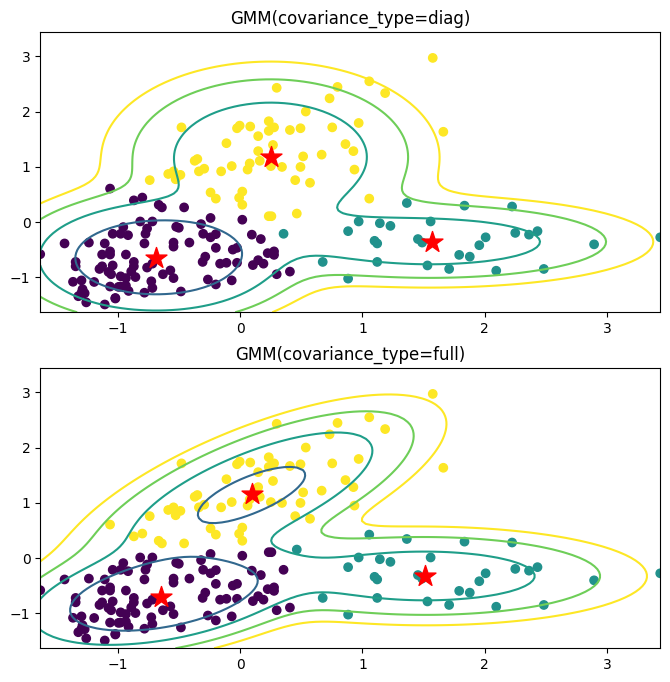

In [4]:
plt.figure(figsize=(8,8)) #プロットのサイズ指定
# 色とプロリンの散布図のGMM(diag)によるクラスタリング
plt.subplot(2, 1, 1)

x = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
y = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0.5, 1, 2 ,3 ,4, 5]) # 等高線のプロット
plt.scatter(X_std[:,0], X_std[:,1], c=model.predict(X_std))
plt.scatter(model.means_[:,0], model.means_[:,1],s=250, marker='*',c='red')
plt.title('GMM(covariance_type=diag)')

# 色とプロリンの散布図のGMM(full)によるクラスタリング
plt.subplot(2, 1, 2)

x = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
y = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model2.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0.5, 1, 2 ,3 ,4, 5]) # 等高線のプロット
plt.scatter(X_std[:,0], X_std[:,1], c=model2.predict(X_std))
plt.scatter(model2.means_[:,0], model2.means_[:,1],s=250, marker='*',c='red')
plt.title('GMM(covariance_type=full)')

plt.show

In [5]:
model.predict(X_std) #予測

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [6]:
model.weights_ #混合係数

array([0.50205356, 0.16777274, 0.33017369])

In [7]:
model.means_ #平均ベクトル

array([[-0.6868842 , -0.65403322],
       [ 1.56542931, -0.35823164],
       [ 0.2490092 ,  1.17653593]])

In [8]:
model.covariances_ # covariance_type='diag'の共分散行列

array([[0.23933717, 0.23551323],
       [0.6251816 , 0.13058492],
       [0.32245863, 0.50435622]])

In [9]:
model2.covariances_ # covariance_type='full'の共分散行列

array([[[ 0.27336913,  0.09125402],
        [ 0.09125402,  0.18958324]],

       [[ 0.6214041 , -0.00121041],
        [-0.00121041,  0.1510427 ]],

       [[ 0.39037121,  0.31258082],
        [ 0.31258082,  0.50410414]]])

In [10]:
# VBGMMのモデルを作成
model3 = BayesianGaussianMixture(n_components=10, covariance_type='full', random_state=18)

#モデルの訓練
model3.fit(X_std)

BayesianGaussianMixture(n_components=10, random_state=18)

<function matplotlib.pyplot.show(close=None, block=None)>

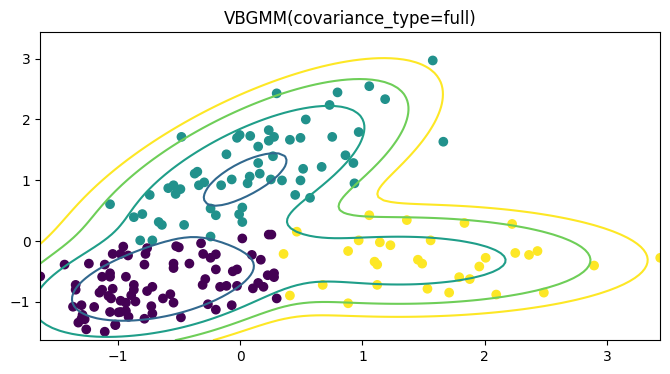

In [11]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# 色とプロリンの散布図のVBGMMによるクラスタリング
x = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
y = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model3.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0.5, 1, 2 ,3 ,4, 5]) # 等高線のプロット
plt.scatter(X_std[:,0], X_std[:,1], c=model3.predict(X_std))
plt.title('VBGMM(covariance_type=full)')

plt.show

In [12]:
model3.means_ #平均ベクトル

array([[-6.77502948e-01, -7.38175594e-01],
       [ 4.85098926e-02,  1.03872535e+00],
       [ 1.31628796e+00, -3.23310118e-01],
       [ 5.34547928e-08,  4.06482179e-08],
       [ 2.42684648e-12,  1.84524976e-12],
       [ 1.35126359e-16, -7.58910663e-17],
       [ 2.49538341e-17, -1.59668721e-16],
       [ 2.49488322e-17, -1.59672525e-16],
       [ 2.49488320e-17, -1.59672525e-16],
       [ 2.49488320e-17, -1.59672525e-16]])

In [13]:
model3.weights_ #混合係数

array([4.31154024e-01, 3.67608890e-01, 2.00698938e-01, 4.89225399e-04,
       4.44749249e-05, 4.04317499e-06, 3.67561363e-07, 3.34146693e-08,
       3.03769721e-09, 2.76154292e-10])

<function matplotlib.pyplot.show(close=None, block=None)>

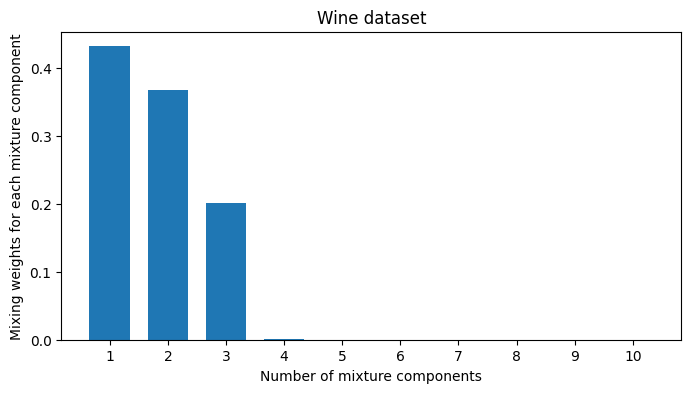

In [14]:
# 混合係数の可視化
x =np.arange(1, model3.n_components+1)

plt.figure(figsize=(8,4)) #プロットのサイズ指定
plt.bar(x, model3.weights_, width=0.7, tick_label=x)

plt.ylabel('Mixing weights for each mixture component')
plt.xlabel('Number of mixture components')
plt.title('Wine dataset')
plt.show